In [54]:
import pandas as pd
import numpy as np
import seaborn as sns

In [55]:
data = {
    'Student_ID': range(1, 101),
    'Math_Score': np.random.randint(40, 100, 100),
    'English_Score': np.random.randint(40, 100, 100),
    'Science_Score': np.random.randint(40, 100, 100),
    'Attendance': np.random.choice([0, 1], size=100)
}

In [56]:
df = pd.DataFrame(data)

In [57]:
df

,Student_ID,Math_Score,English_Score,Science_Score,Attendance
0,1,67,59,55,1
1,2,56,53,56,1
2,3,84,51,93,1
3,4,81,98,47,0
4,5,55,57,47,0
...,...,...,...,...,...
95,96,84,66,70,0
96,97,68,41,80,0
97,98,80,64,40,1
98,99,94,86,72,1


In [58]:
df.isnull().sum()

Student_ID       0
Math_Score       0
English_Score    0
Science_Score    0
Attendance       0
dtype: int64

In [59]:
df.dtypes

Student_ID       int64
Math_Score       int32
English_Score    int32
Science_Score    int32
Attendance       int32
dtype: object

<Axes: >

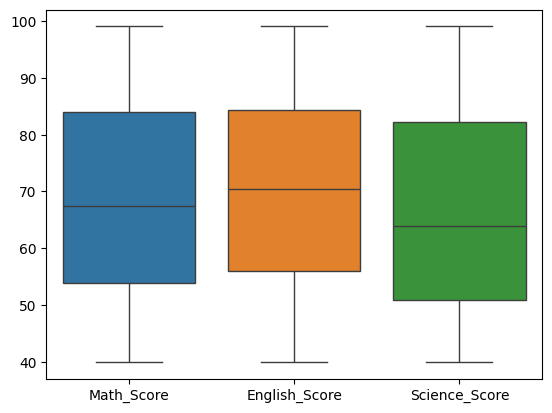

In [60]:
sns.boxplot(data=df[['Math_Score', 'English_Score', 'Science_Score']])

In [61]:
# outlier nhi h toh khud se daal rhe h
df.loc[df['Math_Score'] > 85, 'Math_Score'] += 100
df['Math_Score']

0      67
1      56
2      84
3      81
4      55
     ... 
95     84
96     68
97     80
98    194
99     46
Name: Math_Score, Length: 100, dtype: int32

<Axes: >

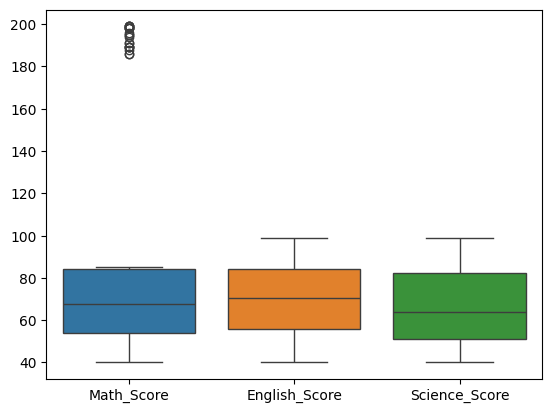

In [62]:
sns.boxplot(data=df[['Math_Score', 'English_Score', 'Science_Score']])

In [63]:
#IQR

q1=df.Math_Score.quantile(0.25)
q2=df.Math_Score.quantile(0.75)
q1,q2

(54.0, 84.0)

In [64]:
IQR=q2-q1
IQR
#iqr is diff between 25% and 75% value

30.0

In [65]:
lower_limit=q1-1.5*IQR
upper_limit=q2+1.5*IQR
lower_limit,upper_limit

(9.0, 129.0)

In [67]:
df[(df.Math_Score<lower_limit) | (df.Math_Score>upper_limit)]

#yeah yeah outliers value h dataset me

,Student_ID,Math_Score,English_Score,Science_Score,Attendance
5,6,199,62,49,0
13,14,195,56,83,0
22,23,199,43,59,1
29,30,186,85,82,0
30,31,189,50,90,0
33,34,191,58,99,1
39,40,195,49,90,1
40,41,198,97,41,0
44,45,189,71,44,1
50,51,198,74,68,0


In [68]:
df[(df.Math_Score>lower_limit) & (df.Math_Score<upper_limit)]
#issey outlier hatt gye

,Student_ID,Math_Score,English_Score,Science_Score,Attendance
0,1,67,59,55,1
1,2,56,53,56,1
2,3,84,51,93,1
3,4,81,98,47,0
4,5,55,57,47,0
...,...,...,...,...,...
94,95,41,74,58,0
95,96,84,66,70,0
96,97,68,41,80,0
97,98,80,64,40,1
